In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [96]:
data = pd.read_csv('CC_GENERAL.csv').iloc[:,1:].dropna()
print(len(data))
print(data.head())

8636
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2           

# DBSCAN

In [30]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [26]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)
scaled_data

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [10]:
clustering = DBSCAN().fit(scaled_data)

In [6]:
labels_set = set(clustering.labels_)
', '.join(map(str, labels_set))

'0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1'

In [7]:
len(labels_set) - 1

36

In [8]:
list(clustering.labels_).count(-1) / len(list(clustering.labels_))

0.7512737378415933

In [80]:
# 4
eps_ = np.arange(0.01, 5.0, 0.1)
info = []
for eps in eps_:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])

Text(0, 0.5, 'Процент выбросов')

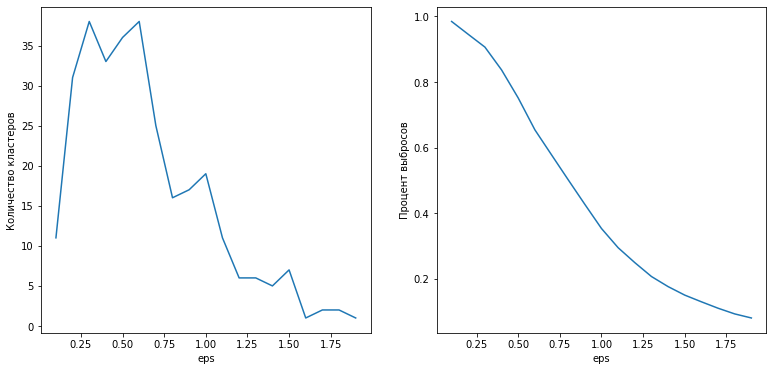

In [81]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(13,6))
ax[0].plot(eps_, info[:,0])
ax[0].set_xlabel('eps')
ax[0].set_ylabel('Количество кластеров')
ax[1].plot(eps_, info[:,1])
ax[1].set_xlabel('eps')
ax[1].set_ylabel('Процент выбросов')

In [77]:
# 5
samples = np.arange(2, 15, 1)
info = []
for sample in samples:
    clustering = DBSCAN(min_samples=sample).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])

Text(0, 0.5, 'Процент выбросов')

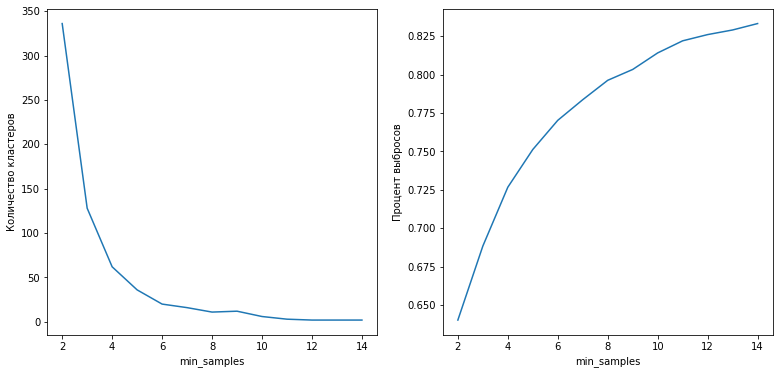

In [32]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(13,6))
ax[0].plot(samples, info[:,0])
ax[0].set_xlabel('min_samples')
ax[0].set_ylabel('Количество кластеров')
ax[1].plot(samples, info[:,1])
ax[1].set_xlabel('min_samples')
ax[1].set_ylabel('Процент выбросов')

In [88]:
# 6
samples = np.arange(1, 4, 1)
eps_ = np.arange(1.5, 2.5, 0.1)
info = {}
for sample in samples:
    for eps in eps_:
        clustering = DBSCAN(eps=eps ,min_samples=sample, n_jobs=-1).fit(scaled_data)
        labels_set = set(clustering.labels_)
        info[(sample, eps)]= [len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))]

In [89]:
print('(samples, eps) -> [count of clusters, percent of ]')
for key, value in info.items():
    if value[0]>=5 and value[0]<=7 and value[1]<=0.12:
        print(key, value)

(samples, eps) -> [count of clusters, percent of ]
(3, 2.0000000000000004) [6, 0.06287633163501621]


In [90]:
clustering = DBSCAN(eps=2, min_samples=3, n_jobs=-1).fit(scaled_data)

In [91]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

In [92]:
pca.explained_variance_ratio_

array([0.47493166, 0.17814415])

In [93]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [94]:
# unique_labels = set(labels)
unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

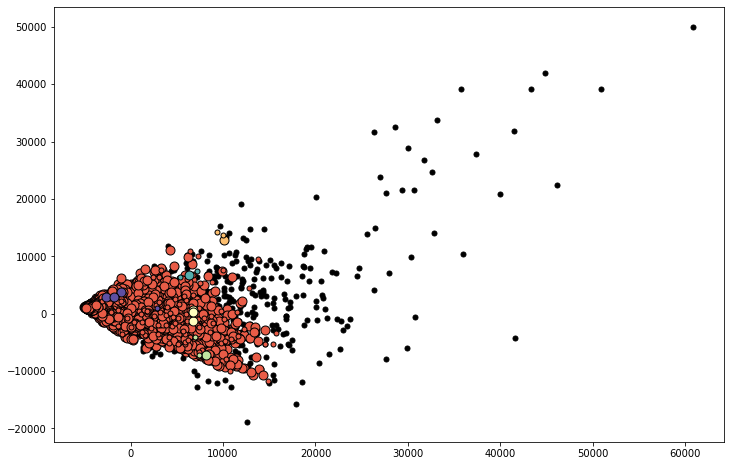

In [95]:
plt.figure(figsize=(12, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=9)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

---
# OPTICS
---

In [106]:
# 6
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, -1}
6
6.310792033348773


In [ ]:
pca_data = PCA(n_components=2).fit_transform(data)

In [100]:
def plot_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')
    
    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

In [104]:
metrics = ['cityblock', 'cosine', 'chebyshev', 'l1', 'braycurtis']

for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1,
                   cluster_method="dbscan", metric=metric).fit(scaled_data)

    print(set(clustering.labels_))
    print(len(set(clustering.labels_)) -1)
    print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
55
39.49745252431681
{0}
0
0.0
{0, 1, -1}
2
1.331635016211209
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
55
39.49745252431681
{0}
0
0.0
